# Christopher Estevez
## Week 2 Part1 Assignment

## Assignment Description
Graph Visualization
This week's assignment is to:

Load a graph database of your choosing from a text file or other source.  If you take a large network dataset from the web (such as fromhttps://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges.

Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing. You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. 

Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.


Please record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.


The packages that I will use for the assignment are Pandas, Networkx, and matplotlib.

In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)
#r'email-Eu-core.txt.gz'

Populating the interactive namespace from numpy and matplotlib


The data used was from stanford.edu the network represents email data from a large European research institution.

https://snap.stanford.edu/data/email-Eu-core.html

The code below extracts the gzip file from the GitHub repository and converts it to a pandas data frame.

In [2]:
data_url =r'https://raw.githubusercontent.com/chrisestevez/DataAnalytics/master/Data620/Assignment2/email-Eu-core.txt.gz'
data_pd = pd.read_table(data_url, compression='gzip', sep=' ',header = None, error_bad_lines=False).drop_duplicates()

Object G will contain the total network loaded in the prior step. 

Printing the network information reveals the nodes, edges, and degrees.

In [3]:
G=nx.from_pandas_edgelist(data_pd,0,1)

In [4]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1005
Number of edges: 16706
Average degree:  33.2458


Plotting the network reveals high concentration in the center of the graph and scatter nodes around the edges.

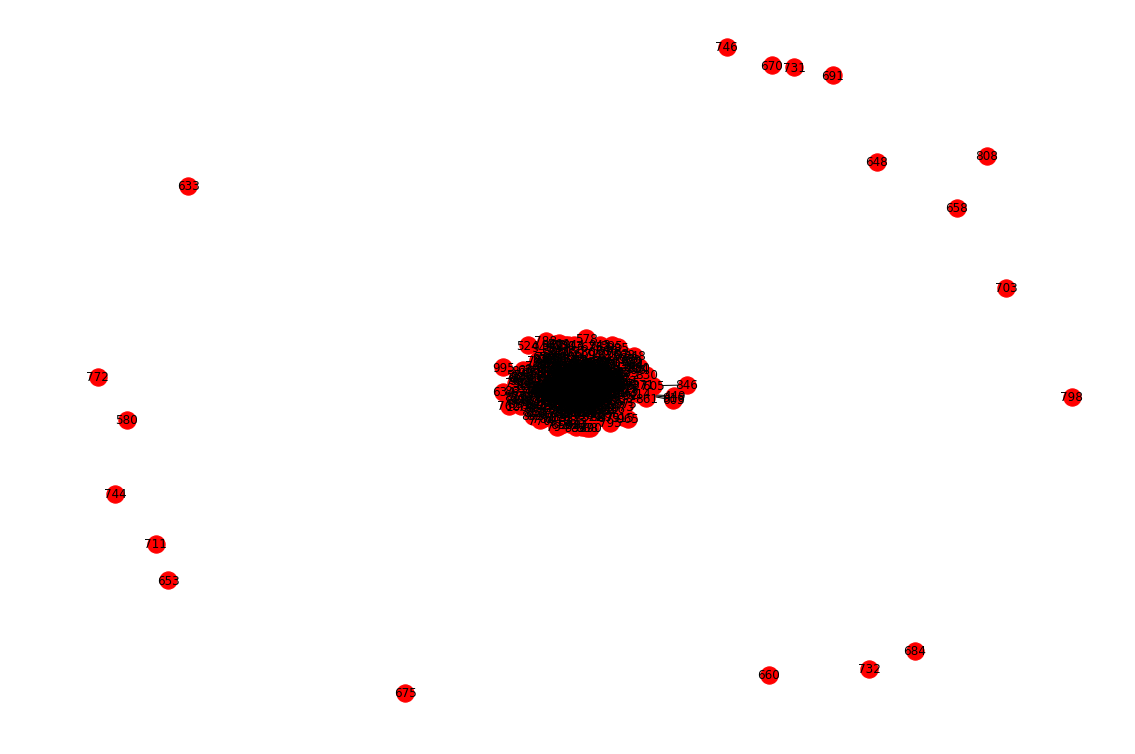

<Figure size 1080x720 with 0 Axes>

In [19]:
nx.draw(G, with_labels=True)
plt.figure(figsize=(15,10))
plt.show() 

After visualizing the network, a subset of the data is taken by first finding the neighbors from node 1 and using the subgraph function from networkx. The new network has a total of 51 nodes and 414 edges.

In [6]:
nodes = G.neighbors(1)
sub_network = G.subgraph(nodes)
print(nx.info(sub_network))

Name: 
Type: SubGraph
Number of nodes: 51
Number of edges: 414
Average degree:  16.2353


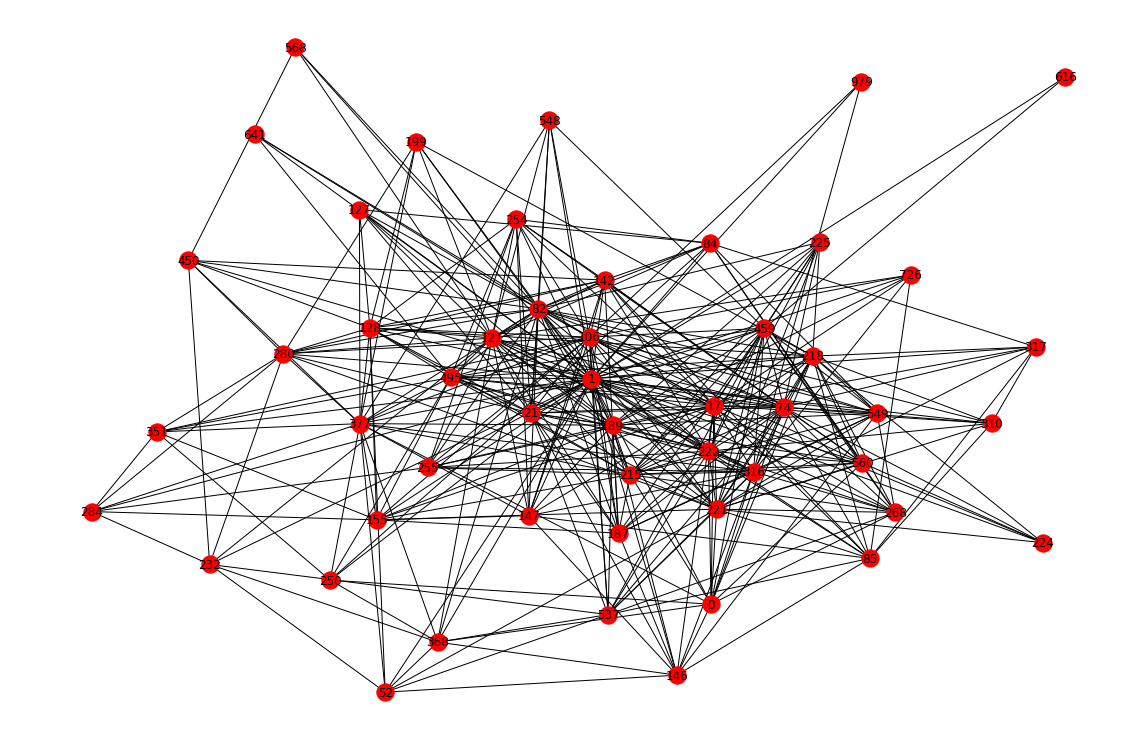

<Figure size 1080x720 with 0 Axes>

In [14]:
nx.draw(sub_network, with_labels=True)
plt.figure(figsize=(15,10))
plt.show()       

## Measures 

The measures chosen for this assignment are a diameter, Degree Centrality, Between Centrality, and cliques within this subnetwork.

The first measure is Diameter and is defined as the maximum eccentricity of any node in the graph, or greatest distance between any pair of nodes in the graph. The subnetwork has a diameter of 2.

In [8]:
nx.diameter(sub_network)

2

Degree Centrality is the measure of nodes connected to another node. Below the highest degree centrality belongs to node 1 followed by 82 this is also influenced by how the subgraph was generated.

In [9]:
degree_centrality = nx.degree_centrality(sub_network)
print("Degree_Centrality, Node")
sorted( ((v,k) for k,v in degree_centrality.iteritems()), reverse=True)


Degree_Centrality, Node


[(1.04, 1),
 (0.64, 82),
 (0.6, 106),
 (0.58, 17),
 (0.56, 121),
 (0.56, 74),
 (0.52, 222),
 (0.5, 221),
 (0.48, 316),
 (0.48, 215),
 (0.46, 377),
 (0.46, 218),
 (0.44, 189),
 (0.44, 21),
 (0.42, 495),
 (0.42, 459),
 (0.38, 128),
 (0.36, 142),
 (0.34, 0),
 (0.32, 549),
 (0.32, 537),
 (0.32, 280),
 (0.3, 187),
 (0.3, 85),
 (0.28, 560),
 (0.28, 254),
 (0.28, 146),
 (0.26, 268),
 (0.26, 255),
 (0.26, 155),
 (0.26, 147),
 (0.26, 84),
 (0.24, 368),
 (0.24, 225),
 (0.2, 450),
 (0.2, 351),
 (0.2, 232),
 (0.2, 52),
 (0.18, 726),
 (0.18, 310),
 (0.18, 284),
 (0.18, 250),
 (0.18, 199),
 (0.16, 317),
 (0.16, 224),
 (0.16, 127),
 (0.14, 548),
 (0.12, 641),
 (0.12, 568),
 (0.1, 979),
 (0.04, 616)]

Between Centrality measures the extent to which a node lies on paths between other nodes. In other words which are the controllers of information in the network.

In [10]:
between_centrality = nx.betweenness_centrality(sub_network)
print("BTW_Centrality, Node")
sorted( ((v,k) for k,v in between_centrality.iteritems()), reverse=True)

BTW_Centrality, Node


[(0.27657634722220553, 1),
 (0.05162776825681988, 82),
 (0.04281954326852286, 106),
 (0.037449516469924636, 121),
 (0.028374037060711732, 377),
 (0.02803243535176309, 17),
 (0.024698907201908406, 221),
 (0.020687195557543694, 74),
 (0.01887266021959899, 316),
 (0.016056030137662793, 218),
 (0.015744757043676606, 459),
 (0.014064281057078177, 495),
 (0.012906078715202366, 222),
 (0.012879854039517906, 189),
 (0.01225515301025505, 21),
 (0.01114224471007184, 128),
 (0.010630018507569526, 215),
 (0.008458677377044723, 142),
 (0.008141835488774262, 280),
 (0.00804856741231291, 537),
 (0.007468719489127655, 0),
 (0.006983184615837677, 84),
 (0.005658273699090026, 146),
 (0.005409782960803369, 85),
 (0.005178879277318653, 155),
 (0.004352224406246015, 560),
 (0.00432097381076973, 368),
 (0.003903845920652643, 147),
 (0.003721789081933139, 549),
 (0.00347076572886897, 187),
 (0.0030795175212942325, 255),
 (0.00303725299643667, 232),
 (0.0025333561996227064, 268),
 (0.0025296698766086524, 254)

The last measure selected was cliques which are groups of people with shared interest. All the cliques for node one were printed, and node 1 had an average clique size of 6.

In [11]:
list(nx.find_cliques(sub_network))


[[1, 0, 368, 377, 250],
 [1, 0, 368, 146],
 [1, 0, 316, 146, 17],
 [1, 0, 316, 215, 377],
 [1, 0, 316, 215, 74, 459, 218, 221, 222, 560],
 [1, 0, 316, 215, 74, 459, 218, 221, 222, 17],
 [1, 0, 316, 215, 74, 459, 218, 221, 222, 268],
 [1, 224, 74, 218, 221, 560],
 [1, 224, 74, 218, 221, 17],
 [1, 616, 459],
 [1, 316, 146, 187, 549],
 [1, 316, 146, 147, 17],
 [1, 316, 147, 17, 121],
 [1, 316, 147, 377],
 [1, 316, 726, 17, 121],
 [1, 316, 215, 377, 495],
 [1, 316, 215, 74, 121, 222, 17, 221],
 [1, 316, 215, 74, 121, 222, 17, 495],
 [1, 316, 215, 74, 121, 222, 187],
 [1, 316, 215, 74, 459, 218, 549, 268, 221],
 [1, 316, 215, 74, 459, 218, 495, 17, 222],
 [1, 316, 215, 74, 459, 187, 549],
 [1, 316, 215, 74, 459, 187, 222],
 [1, 316, 215, 255, 17, 121, 222],
 [1, 316, 537, 74, 459, 268, 221, 222],
 [1, 316, 979],
 [1, 459, 74, 549, 106, 187],
 [1, 459, 74, 549, 106, 268, 221],
 [1, 459, 74, 222, 225, 17, 218, 221, 215],
 [1, 459, 74, 222, 106, 268, 537, 221],
 [1, 459, 74, 222, 106, 21, 187]

In [12]:
Vals = []
for clique in nx.find_cliques(sub_network):
    Vals.append(len(clique))

print("Average Cliques")
print(round(average(Vals)))   


Average Cliques
6.0


# Sources

https://snap.stanford.edu/data/email-Eu-core.html

https://www.cl.cam.ac.uk/~cm542/teaching/2011/stna-pdfs/stna-lecture11.pdf

https://www.sci.unich.it/~francesc/teaching/network/

